In [3]:
%pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 53.8 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 12.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from scipy import stats, optimize
import numpy as np
import statsmodels.api as sm

# Get data

In [3]:
kidney_df=pd.read_csv(r'https://hastie.su.domains/CASI_files/DATA/kidney.txt',sep=' ')

In [4]:
kidney_df

,age,tot
0,18,2.44
1,19,3.86
2,19,-1.22
3,20,2.30
4,21,0.98
...,...,...
152,73,-0.33
153,74,-5.73
154,80,-5.14
155,82,-2.08


# Chapter 1 

## Linear regression

<Axes: xlabel='age', ylabel='tot'>

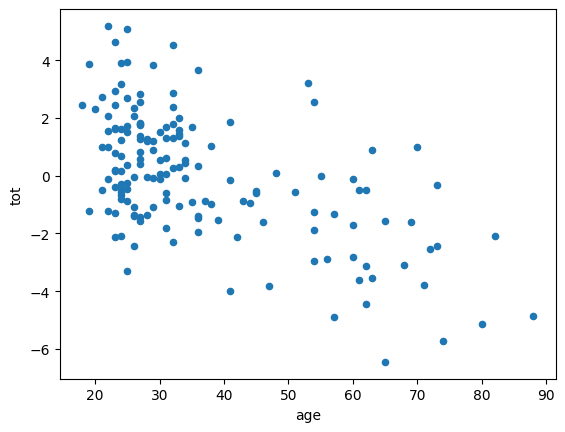

In [5]:
kidney_df.plot(kind='scatter', x='age',y='tot')

In [6]:
kidney_linregress=stats.linregress(kidney_df)

In [7]:
kidney_linregress

LinregressResult(slope=-0.07858841572701149, intercept=2.8600267991346726, rvalue=-0.5718387010425371, pvalue=5.181704785532606e-15, stderr=0.00905580023946074, intercept_stderr=0.35956457039569895)

In [8]:
for age_decade in range(20,90,10):
    print(age_decade,age_decade*kidney_linregress.stderr)#+kidney_linregress.intercept_stderr

20 0.1811160047892148
30 0.27167400718382223
40 0.3622320095784296
50 0.45279001197303703
60 0.5433480143676445
70 0.6339060167622518
80 0.7244640191568592


## lowess

In [13]:
lowess_df=pd.DataFrame(sm.nonparametric.lowess(kidney_df.tot,kidney_df.age,frac=1/3)).set_index(0)

<Axes: xlabel='0'>

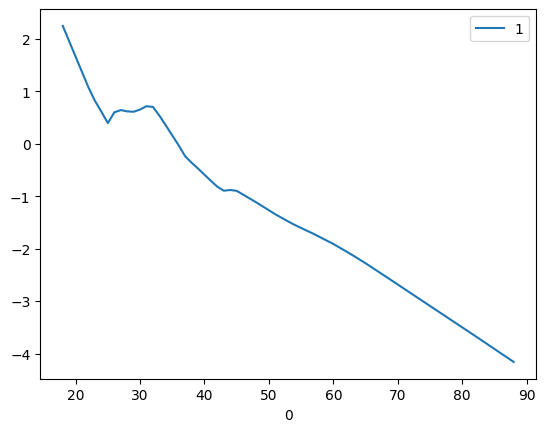

In [14]:
lowess_df.plot()

# Chapter 8

In [15]:
kidney_df[kidney_df['age']==55]

,age,tot
130,55,-0.01


In [16]:
kidney_linregress.slope*55+kidney_linregress.intercept

-1.462336065850959

In [24]:
lowess_df.loc[55]

1   -1.604686
Name: 55.0, dtype: float64